## Úlohy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

### Úloha 8.1

Načítajte dáta World Happiness Record 2016 a 2017.

* Vyberte iba atribúty `Country`, `Score` a `Rank`.
* Spojte tabuľky podľa názvu štátu tak aby tam boli všetky hodnoty z oboch tabuliek. Atribúty `Score` a `Rank` vhodne premenujte podľa roku.
* Pridajte nový atribút `Diff` ktorého hodnoty budú rovné `Score 2017` - `Score 2016`
* Zobrazte histogram atribútu `Diff`.

V roku 2017 je viac štátov, ktoré sa zlepšili, alebo zhoršili?

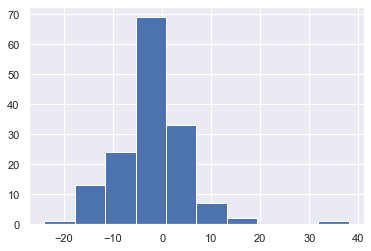

In [3]:
# načítame dáta za rok 2016
data_2016 = pd.read_csv("../data/2016.csv")
# vyberieme iba stĺpce `Country`, `Rank` a `Score`
data_2016 = data_2016[["Country", "Rank", "Score"]]
# premenujeme `Rank` a `Score` podľa roku
data_2016 = data_2016.rename(columns={"Rank":"Rank 2016", "Score":"Score 2016"})

# podobne načítame a predspracujeme dáta za rok 2017
data_2017 = pd.read_csv("../data/2017.csv")
data_2017 = data_2017[["Country", "Rank", "Score"]]
data_2017 = data_2017.rename(columns={"Rank":"Rank 2017", "Score":"Score 2017"})

# spojíme dáta podľa názvu štátu, zjednotíme všetky hodnoty z ľavej aj pravej tabuľky
# (metóda spájania `outer`)
data_all = pd.merge(left=data_2016, right=data_2017, left_on="Country", right_on="Country", how="outer")
# vypočítame si rozdiel v hodnotení a zobrazíme histogram
data_all["Diff"] = data_all["Rank 2017"] - data_all["Rank 2016"]
pl = data_all["Diff"].hist()

### Úloha 8.2

Načítajte dáta World Happiness Record 2017.

* Vyberte do tabuľky iba základné faktory (`GDP`, `Family`, `Health`, `Freedom`, `Trust`, `Generosity`).
* Normalizujte dáta do intervalu 0-1.
* Pridajte do normalizovanej tabuľky názvy štátov a regiónov.
* Uložte dáta do Excel súboru.

In [10]:
# naimportujeme si potrebné objekty z knižnice `sklearn`
from sklearn.preprocessing import MinMaxScaler

# načítame dáta do pomocnej tabuľky
table = pd.read_csv("../data/2017.csv")

# vyberieme si iba základné faktory
data_2017 = table[["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
# vytvoríme si objekt pre normalizáciu do intervalu 0-1
min_max = MinMaxScaler()
# transformujeme dáta
norm_array = min_max.fit_transform(data_2017)
# z transformovaných dát vytvoríme nový dátový rámec `pandas`
# názvy stĺpcov skopírujeme z pôvodnej tabuľky
data_2017 = pd.DataFrame(norm_array, columns = data_2017.columns)
# k transformovaným faktorom pridáme `Country` a `Region`
data_2017["Country"] = table["Country"]
data_2017["Region"] = table["Region"]

# uložíme dáta do Excel súboru
data_2017.to_excel("../data/2017_processed.xlsx", index=False)
# zobrazíme si prvých 5 transformovaných riadkov
data_2017.head()

,GDP,Family,Health,Freedom,Trust,Generosity,Country,Region
0,0.864065,0.952160,0.839045,0.965323,0.680505,0.431957,Norway,Western Europe
1,0.792394,0.963086,0.834726,0.951019,0.863156,0.423924,Denmark,Western Europe
2,0.791458,1.000000,0.877892,0.952775,0.330657,0.567420,Iceland,Western Europe
3,0.836545,0.941845,0.903779,0.942001,0.790440,0.346686,Switzerland,Western Europe
4,0.771648,0.956334,0.852200,0.938780,0.824047,0.292913,Finland,Western Europe


### Úloha 8.3

Načítajte predspracované dáta z predchádzajúcej úlohy.

* Vypočítajte dve hlavné komponenty.
* Vizualizujte hlavné komponenty na X-Y grafe, ako farbu zobrazte región štátu.

Čo viete povedať o centrálnej Európe? Koľko celkovej variancie pôvodných dát je zachovaných vo vizualizácii?

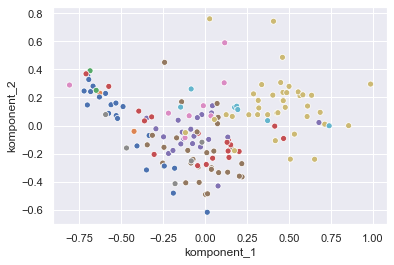

In [9]:
# naimportujeme si potrebné objekty z knižnice `sklearn`
from sklearn.decomposition import PCA

# načítame si predspracované dáta
table = pd.read_excel("../data/2017_processed.xlsx")

# vyberieme iba číselné atribúty
data = table[["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
# vytvoríme si objekt pre metódu hlavných komponentov, vypočítame prvé dva komponenty
pca = PCA(n_components=2)
# vypočítame transformované dáta
pca_array = pca.fit_transform(data)
# z transformovaných dát si vytvoríme dátový rámec
pca_data = pd.DataFrame(pca_array, columns=["komponent_1", "komponent_2"])
# pridáme `Region`
pca_data["Region"] = table["Region"]
# zobrazíme si X-Y graf, farebne zobrazíme krajiny z rôznych regiónov
pl = sns.scatterplot(data=pca_data, x="komponent_1", y="komponent_2", hue="Region", legend=False)